In [483]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
import xgboost as xgb
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_palette("Set2")
sns.set_style("ticks")

In [484]:
# 파일 경로
file_path = 'C:/hkpark_/data-science-tutorial/data-science-tutorial/dataset/house_price_youngsan.txt'

# 탭으로 구분된 파일 불러오기
df = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')
df.head(20)

,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd
0,서울특별시 용산구 후암동,브라운스톤남산,166.980,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-
1,서울특별시 용산구 후암동,후암미주,62.280,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-
2,서울특별시 용산구 후암동,뉴후암,67.110,202202,12,75000,-,3,1973,후암로 71,직거래,-,-
3,서울특별시 용산구 후암동,남산애지앙,44.880,202202,7,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-
4,서울특별시 용산구 후암동,후암,84.110,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-
5,서울특별시 용산구 후암동,후암맨션,72.130,202111,4,74500,-,6,1974,후암로44길 8,중개거래,서울 용산구,-
6,서울특별시 용산구 후암동,브라운스톤남산,166.560,202109,14,170000,-,3,2004,후암로 65,-,-,-
7,서울특별시 용산구 후암동,남산애지앙,44.880,202108,26,50000,-,1,2003,후암로34길 31-17,-,-,-
8,서울특별시 용산구 후암동,신후암,66.510,202107,31,53000,-,6,1971,후암로28길 10,-,-,-
9,서울특별시 용산구 후암동,화인,143.250,202106,26,120000,-,2,2002,후암로16길 27,-,-,-


In [485]:
# cntr_ymd 변수를 생성 (cntr_ym과 cntr_d 결합)
df['cntr_ymd'] = df['cntr_ym'] + df['cntr_d']

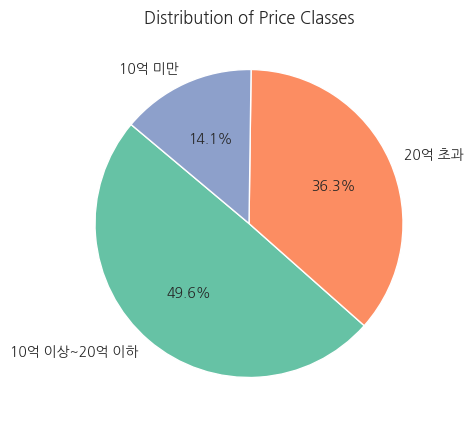

In [486]:
# age_cls 변수 생성
def classify_price_nm(price):
    if price < 100000:
        return '10억 미만'
    elif price <= 200000:
        return '10억 이상~20억 이하'
    else:
        return '20억 초과'
df['price_cls_nm'] = df['price'].apply(classify_price_nm)


# age_cls 변수 생성
def classify_price(price):
    if price < 100000:
        return '1'
    elif price < 200000:
        return '2'
    else:
        return '3'
df['price_cls'] = df['price'].apply(classify_price)



# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# price_cls 값의 분포에 대한 파이차트 그리기
price_cls_counts = df['price_cls_nm'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(price_cls_counts, labels=price_cls_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Price Classes')
plt.show()

In [487]:
# 평형대(area_pyeong) : area 변수의 3.3 m2 를 나눠서 평으로 환산, 평형 구분 할 것
df['area_pyeong'] =round(df.area/3.3,1) #평으로 환산
df['area_pyeong_cls']=(df.area//33)*10 #평형대으로 환산 : 10의 자리에서 버림 ( // 연산자는 나눗셈 후 소수점 이하를 버리는 연산자 )

# age_cls 변수 생성
def classify_area_pyeong(area_pyeong_cls):
    if area_pyeong_cls < 10:
        return '10평미만'
    elif area_pyeong_cls < 20:
        return '10평대'
    elif area_pyeong_cls < 30:
        return '20평대'
    elif area_pyeong_cls < 40:
        return '30평대'
    elif area_pyeong_cls < 50:
        return '40평대'
    else:
        return '50평대이상'

df['area_pyeong_cls_adj'] = df['area_pyeong_cls'].apply(classify_area_pyeong)

df['cntr_ym_str']=df['cntr_ym'].astype(str)
df['cntr_y']=df['cntr_ym_str'].str[:4].astype(int)
df['cntr_m']=df['cntr_ym_str'].str[-2:]

df['age']=df['cntr_y']-df['built_year'] #계약년월-건축년도

df['age_cls_10'] = df['age'].apply(lambda x: 1 if x < 10 else 0) #10년이내
df['age_cls_20'] = df['age'].apply(lambda x: 1 if x >= 10 and x <20 else 0) 
df['age_cls_30'] = df['age'].apply(lambda x: 1 if x >= 20 and x <30 else 0) 
df['age_cls_40'] = df['age'].apply(lambda x: 1 if x >= 30 and x <40 else 0) 
df['age_cls_40_over'] = df['age'].apply(lambda x: 1 if x >= 40 else 0) 

df['floor_indicator'] = df['floor'].apply(lambda x: 1 if x == 1 else 0)
df['trns_type_직거래'] = df['trns_type'].apply(lambda x: 1 if x == '직거래' else 0)# 직거래여부

def classify_floor(floor):
    if floor > 20:
        return '20층 초과'
    elif floor > 10:
        return '10층 초과'
    elif floor > 1:
        return '2~10층'
    elif floor == 1:
        return '1층'
    else:
        return '기타'


df['floor_cls']=df['floor'].apply(classify_floor)


# age_cls 변수 생성
def classify_age(age):
    if age < 10:
        return 1
    elif age < 20:
        return 2
    elif age < 30:
        return 3
    elif age < 40:
        return 4
    else:
        return '4+'

df['age_cls'] = df['age'].apply(classify_age)

# 동 변수(sigungu_dong) : sigungu에서 11번째 자리부터 뒤에 쭉
df['sigungu_dong'] = df['sigungu'].str[10:]
df.head()
# selected_df=df[['area','area_pyeong','area_pyeong_cls','floor','floor_indicator','cntr_ym','cntr_y'
#                 ,'built_year','age','age_cls_10','age_cls_20','age_cls_30','age_cls_40','age_cls_40_over','age_cls','sigungu','sigungu_dong','trns_type_직거래','trns_type']]
# selected_df.iloc[10:21, ]



,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd,cntr_ymd,price_cls_nm,price_cls,area_pyeong,area_pyeong_cls,area_pyeong_cls_adj,cntr_ym_str,cntr_y,cntr_m,age,age_cls_10,age_cls_20,age_cls_30,age_cls_40,age_cls_40_over,floor_indicator,trns_type_직거래,floor_cls,age_cls,sigungu_dong
0,서울특별시 용산구 후암동,브라운스톤남산,166.98,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-,202229,20억 초과,3,50.6,50.0,50평대이상,202204,2022,04,18,0,1,0,0,0,0,0,2~10층,2,후암동
1,서울특별시 용산구 후암동,후암미주,62.28,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-,202227,10억 이상~20억 이하,2,18.9,10.0,10평대,202203,2022,03,42,0,0,0,0,1,0,0,2~10층,4+,후암동
2,서울특별시 용산구 후암동,뉴후암,67.11,202202,12,75000,-,3,1973,후암로 71,직거래,-,-,202214,10억 미만,1,20.3,20.0,20평대,202202,2022,02,49,0,0,0,0,1,0,1,2~10층,4+,후암동
3,서울특별시 용산구 후암동,남산애지앙,44.88,202202,7,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-,202209,10억 미만,1,13.6,10.0,10평대,202202,2022,02,19,0,1,0,0,0,1,0,1층,2,후암동
4,서울특별시 용산구 후암동,후암,84.11,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-,202136,10억 미만,1,25.5,20.0,20평대,202111,2021,11,19,0,1,0,0,0,0,1,2~10층,2,후암동


In [488]:
# filtered_df = df[(df['trns_type'] != '직거래')&(df['register_ymd'] != '-')]  
# filtered_df.head()
# filtered_df.shape

In [489]:
# 각 값의 비율 계산
value_counts = df['sigungu_dong'].value_counts(normalize=True)#비율계산

# 5% 이상인 값을 유지하고, 그렇지 않은 값을 '기타'로 대체
threshold = 0.03
df['sigungu_dong_adj'] = df['sigungu_dong'].apply(lambda x: x if value_counts[x] >= threshold else '기타')

df.head()


,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd,cntr_ymd,price_cls_nm,price_cls,area_pyeong,area_pyeong_cls,area_pyeong_cls_adj,cntr_ym_str,cntr_y,cntr_m,age,age_cls_10,age_cls_20,age_cls_30,age_cls_40,age_cls_40_over,floor_indicator,trns_type_직거래,floor_cls,age_cls,sigungu_dong,sigungu_dong_adj
0,서울특별시 용산구 후암동,브라운스톤남산,166.98,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-,202229,20억 초과,3,50.6,50.0,50평대이상,202204,2022,04,18,0,1,0,0,0,0,0,2~10층,2,후암동,기타
1,서울특별시 용산구 후암동,후암미주,62.28,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-,202227,10억 이상~20억 이하,2,18.9,10.0,10평대,202203,2022,03,42,0,0,0,0,1,0,0,2~10층,4+,후암동,기타
2,서울특별시 용산구 후암동,뉴후암,67.11,202202,12,75000,-,3,1973,후암로 71,직거래,-,-,202214,10억 미만,1,20.3,20.0,20평대,202202,2022,02,49,0,0,0,0,1,0,1,2~10층,4+,후암동,기타
3,서울특별시 용산구 후암동,남산애지앙,44.88,202202,7,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-,202209,10억 미만,1,13.6,10.0,10평대,202202,2022,02,19,0,1,0,0,0,1,0,1층,2,후암동,기타
4,서울특별시 용산구 후암동,후암,84.11,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-,202136,10억 미만,1,25.5,20.0,20평대,202111,2021,11,19,0,1,0,0,0,0,1,2~10층,2,후암동,기타


In [490]:
# filtered_df = df.copy()
# filtered_df = df[(df['trns_type'] != '직거래')]  
filtered_df = df[(df['trns_type'] != '직거래')&(df['price'] <=200000)&(df['price'] >=100000)]  
# filtered_df = df[(df['trns_type'] != '직거래')&(df['area_pyeong'] >=20)&(df['area_pyeong'] <=40)]  

# filtered_df = df[(df['trns_type'] != '직거래')&(df['price_cls'] =='2')]  #10억초과~20억미만
# filtered_df = df[(df['trns_type'] != '직거래')&(df['price'] <100000)]  #10억미만


# filtered_df = df[(df['dong'] == '이촌동') | (df['dong'] == '한남동')]
# filtered_df = df.loc[(df['A'] >= 3) & (df['B'] <= 30)]

# Features와 Target 설정
# 층, 1층여부, 건축연도, 계약연도, 평형, 평형구분, 연식, 연식구분, 동
# X = filtered_df[['floor', 'floor_indicator', 'built_year', 'cntr_y', 'area_pyeong', 'area_pyeong_cls', 'age'
#                                 , 'age_cls_10', 'age_cls_20', 'age_cls_30', 'age_cls_40', 'age_cls_40_over'
#                                 , 'sigungu_dong_adj']]
# X = pd.get_dummies(filtered_df[['floor', 'floor_indicator', 'built_year', 'cntr_y', 'area_pyeong', 'area_pyeong_cls', 'age'
#                                 , 'age_cls_10', 'age_cls_20', 'age_cls_30', 'age_cls_40', 'age_cls_40_over'
#                                 , 'sigungu_dong_adj']], drop_first=True)


#-- 1.평형, 층
# X = filtered_df[[ 'area_pyeong', 'floor']]


#-- 2.평형, 층, 연식
# X = filtered_df[[ 'area_pyeong', 'floor', 'age']]


#-- 3.평형, 층, 연식, 평형구분, 층구분, 연식구분, 행정동구분
X = filtered_df[[ 'floor_cls', 'area_pyeong', 'age', 'floor', 'area_pyeong_cls_adj', 'age_cls'#, 'built_year', 'cntr_y','cntr_m'
                                , 'sigungu_dong_adj']]
X = pd.get_dummies(filtered_df[['floor_cls', 'area_pyeong', 'age', 'floor', 'area_pyeong_cls_adj', 'age_cls'
                                , 'sigungu_dong_adj']], drop_first=True)
y = filtered_df['price']


print(X.shape)
X.head()

(689, 21)


,area_pyeong,age,floor,floor_cls_1층,floor_cls_20층 초과,floor_cls_2~10층,floor_cls_기타,area_pyeong_cls_adj_30평대,age_cls_2,age_cls_3,age_cls_4,age_cls_4+,sigungu_dong_adj_도원동,sigungu_dong_adj_문배동,sigungu_dong_adj_산천동,sigungu_dong_adj_원효로4가,sigungu_dong_adj_이촌동,sigungu_dong_adj_이태원동,sigungu_dong_adj_한강로3가,sigungu_dong_adj_한남동,sigungu_dong_adj_효창동
5,21.9,47,6,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
8,20.2,50,6,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
11,39.7,9,12,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
15,39.7,8,27,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
16,27.6,19,5,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [491]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return mape, rmse, mae, r2
    

In [492]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt


# 학습(train)과 테스트(test) 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [493]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 각 모델 학습 및 평가
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = evaluate_model(y_test, y_pred)

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, index=['MAPE', 'RMSE', 'MAE', 'R^2'])

# 결과를 CSV 파일로 저장
results_df.to_csv('model_evaluation_results.csv')

print(results_df)
print("Results saved to model_evaluation_results.csv")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 551, number of used features: 18
[LightGBM] [Info] Start training from score 195966.393829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

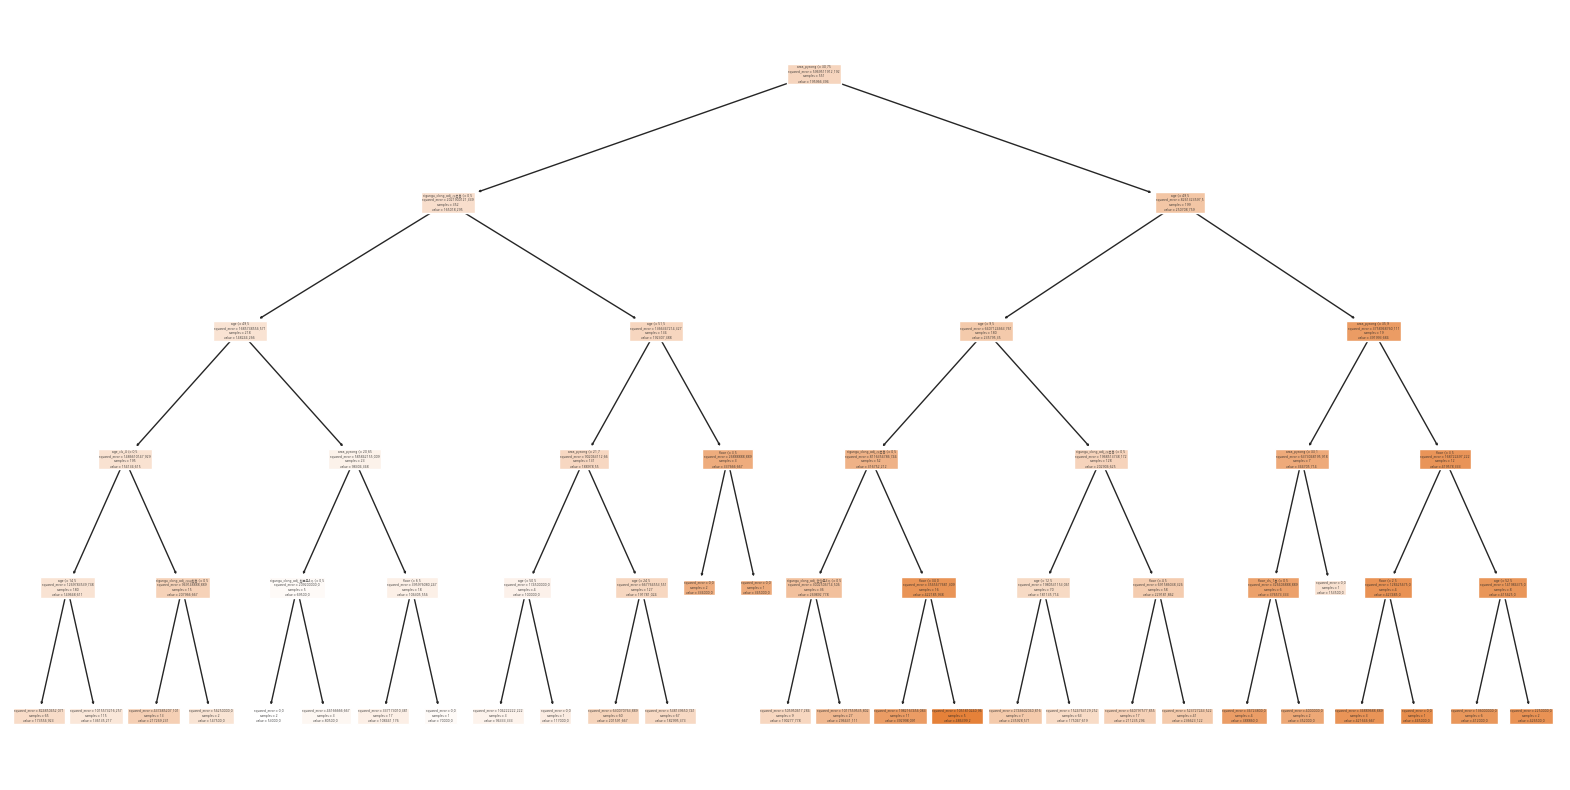

                   Feature  Importance
0              area_pyeong    0.395903
1                      age    0.332066
16    sigungu_dong_adj_이촌동    0.126004
2                    floor    0.072432
18  sigungu_dong_adj_한강로3가    0.029617


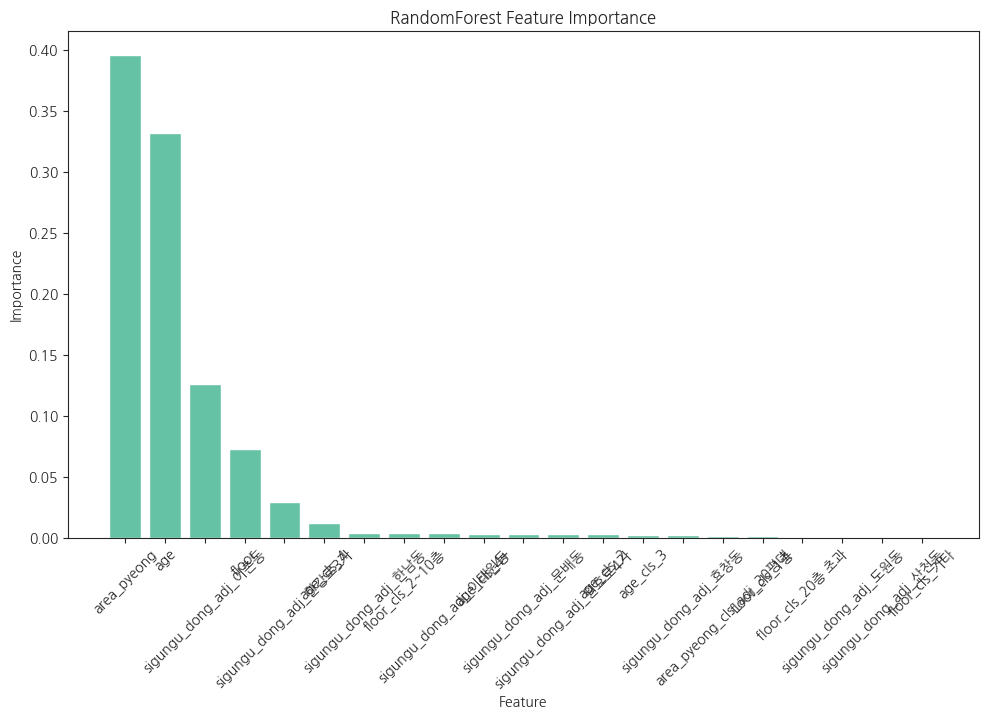

                   Feature  Importance
16    sigungu_dong_adj_이촌동    0.283944
18  sigungu_dong_adj_한강로3가    0.237131
10               age_cls_4    0.165811
0              area_pyeong    0.074606
1                      age    0.069467


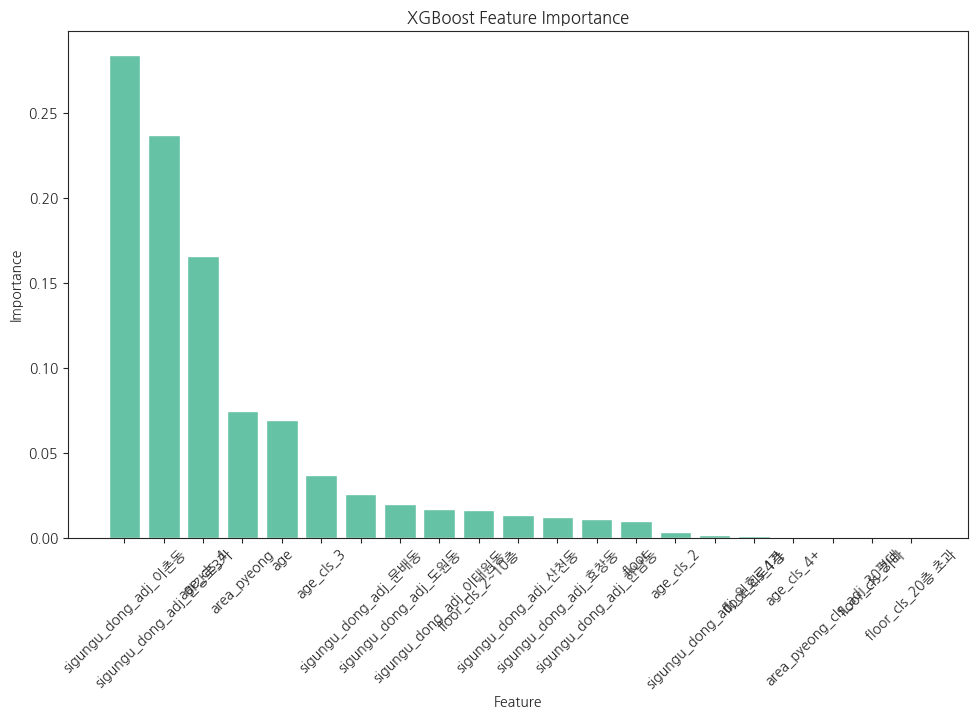

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 551, number of used features: 18
[LightGBM] [Info] Start training from score 195966.393829
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

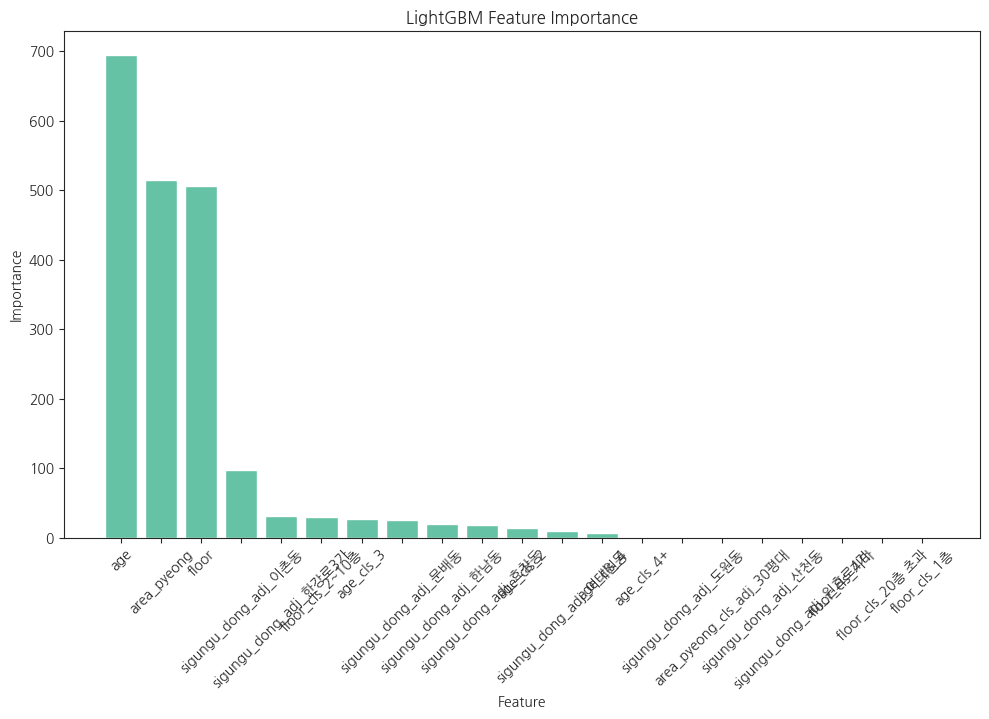

Learning rate set to 0.037263
0:	learn: 75586.3603151	total: 837us	remaining: 836ms
1:	learn: 73807.3168821	total: 1.77ms	remaining: 884ms
2:	learn: 72101.5081987	total: 2.51ms	remaining: 836ms
3:	learn: 70655.1280704	total: 3.15ms	remaining: 784ms
4:	learn: 69068.5401765	total: 3.95ms	remaining: 787ms
5:	learn: 67493.8561068	total: 4.86ms	remaining: 805ms
6:	learn: 66111.0643082	total: 5.55ms	remaining: 787ms
7:	learn: 64765.1432865	total: 6.2ms	remaining: 769ms
8:	learn: 63612.7223468	total: 6.62ms	remaining: 729ms
9:	learn: 62258.8171201	total: 7.17ms	remaining: 710ms
10:	learn: 61163.3197844	total: 7.82ms	remaining: 703ms
11:	learn: 59949.8161768	total: 8.48ms	remaining: 698ms
12:	learn: 59080.5687324	total: 9.15ms	remaining: 695ms
13:	learn: 57952.3530797	total: 9.97ms	remaining: 702ms
14:	learn: 57094.2229825	total: 10.5ms	remaining: 692ms
15:	learn: 55981.1270393	total: 11.2ms	remaining: 687ms
16:	learn: 55024.6901335	total: 11.9ms	remaining: 690ms
17:	learn: 54044.7168485	total

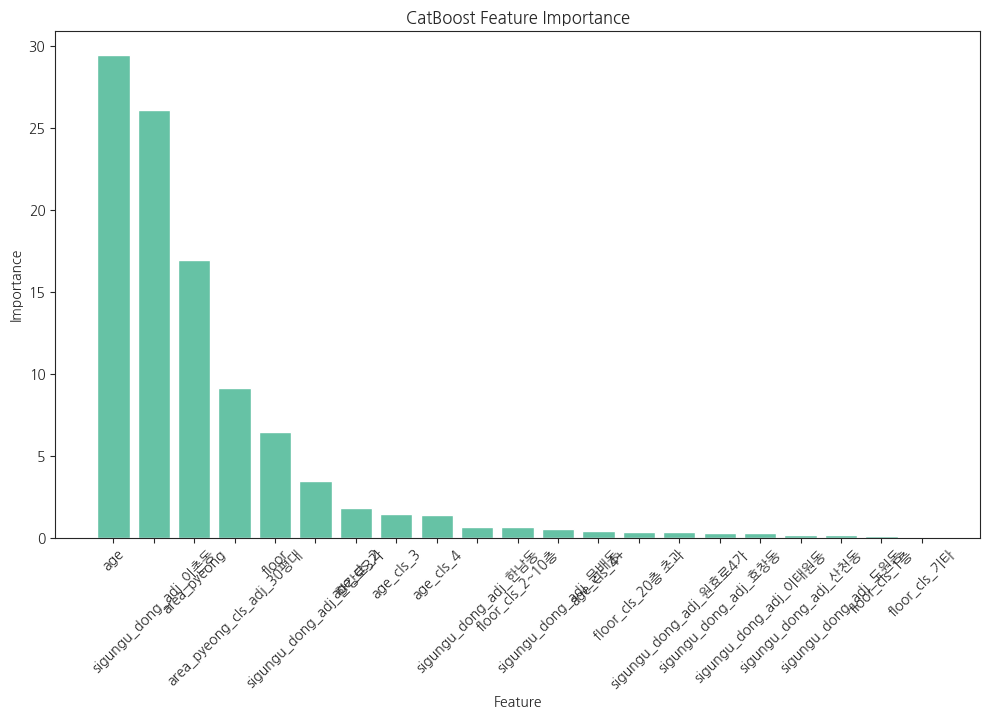

      LinearRegression  DecisionTree  RandomForest       XGBoost  \
MAPE         19.475218     14.282686     12.369978     13.373949   
RMSE      50029.740945  43070.106638  31538.407456  34106.210328   
MAE       35544.800282  25720.628019  21438.046274  22250.442199   
R^2           0.567212      0.679247      0.828012      0.798866   

          LightGBM      CatBoost  
MAPE     15.387408     12.879002  
RMSE  35169.571679  31694.869859  
MAE   25478.635018  21922.118332  
R^2       0.786129      0.826301  
Results saved to model_evaluation_results.csv


In [494]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'


# 각 모델 학습 및 평가
models = {
    'DecisionTree': DecisionTreeRegressor(max_depth=5),
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = evaluate_model(y_test, y_pred)
    
    #DT의 Tree 출력
    if name == 'DecisionTree':
        plt.figure(figsize=(20,10))
        plot_tree(model, feature_names=X.columns, filled=True)
        plt.show()


    #feature importance 출력
    elif name in ['DecisionTree','RandomForest','XGBoost', 'LightGBM', 'CatBoost']:
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        })
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print(importance_df.head())
        plt.figure(figsize=(10,6))
        plt.bar(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'{name} Feature Importance')
        plt.tight_layout()  # 그래프 요소들이 서로 겹치지 않도록 조정
        plt.xticks(rotation=45)
        plt.show()

# 결과를 DataFrame으로 변환
# results_df = pd.DataFrame(results, index=['MAPE', 'RMSE', 'MAE', 'R^2'])

# # 결과를 CSV 파일로 저장
# results_df.to_csv('model_evaluation_results.csv')

print(results_df)
print("Results saved to model_evaluation_results.csv")